In [2]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler
import plotly.plotly as py
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.decomposition import PCA as pc


In [12]:
TrainDf = pd.read_csv('aps_failure_training_set_processed_8bit.csv')
X_all = TrainDf.drop('class',axis=1)
Y = TrainDf['class']
Y = Y.round()
Y = Y.replace(to_replace=-1,value=0)

Test = pd.read_csv('aps_failure_test_set_processed_8bit.csv')
TestFe = Test.drop('class',axis=1)
TestL = Test['class']
TestL = TestL.round()
TestL = TestL.replace(to_replace=-1,value=0)

In [4]:
X_std = StandardScaler().fit_transform(X_all)
pca_ = pc(n_components=13)
X = pca_.fit_transform(X_std)
TestLstd = StandardScaler().fit_transform(TestFe)
Xtest = pca_.fit_transform(TestLstd)

In [5]:
def PCA(X_all):
    X_std = StandardScaler().fit_transform(X_all)
    covM = np.cov(X_std.T)
    eigvalues, eigvectors = np.linalg.eig(covM)
    eig_pairs = [(np.abs(eigvalues[i]), eigvectors[:,i]) for i in range(len(eigvalues))]
    eig_pairs.sort()
    eig_pairs.reverse()
    matrix_w = np.hstack((eig_pairs[0][1].reshape(170,1), 
                      eig_pairs[1][1].reshape(170,1),
                      eig_pairs[2][1].reshape(170,1), 
                      eig_pairs[3][1].reshape(170,1),
                      eig_pairs[4][1].reshape(170,1), 
                      eig_pairs[5][1].reshape(170,1),
                      eig_pairs[6][1].reshape(170,1), 
                      eig_pairs[7][1].reshape(170,1),
                      eig_pairs[8][1].reshape(170,1), 
                      eig_pairs[9][1].reshape(170,1),
                      eig_pairs[10][1].reshape(170,1), 
                      eig_pairs[11][1].reshape(170,1),
                      eig_pairs[12][1].reshape(170,1), 
                      ))
    ProjX = X_std.dot(matrix_w)
    return ProjX

In [6]:
import math

In [7]:
from sklearn.metrics import confusion_matrix

In [18]:

confus = confusion_matrix(TestL[:3000], predictions)

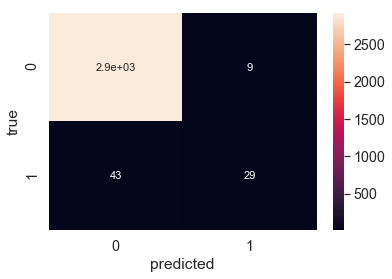

In [21]:
sbn.set(font_scale=1.3)
a = sbn.heatmap(confus, annot=True,annot_kws={"size": 11})
a.set(xlabel='predicted', ylabel='true')
figure = a.get_figure()  
figure.savefig('knnconfus.png')

In [0]:
for i in range(len(a)):
  if(a[i] != 0.5):
    a[i] = a[i].round()
  else:
    a[i] = 0

In [0]:
Xdownsampled = X[:1000]
Ydownsampled = Y[:1000]
Xtestdown = Xtest[:1000]

In [10]:
import operator
def dist(x,y, length):
    dist = 0.0
    for i in range(length):
        dist += pow(float(x[i])- float(y[i]),2)
    return dist**dist
def Neighbors(X, Y, k):
    all_distance = []
    length = len(Y)-1
    for x in range(len(X)):
        dist = dist(Y, X[x], length)
        distances.append((X[x], dist))
    all_distance.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

def Response(neighbors):
    Votes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in Votes:
            Votes[response] += 1
        else:
            Votes[response] = 1
        sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

In [14]:
X_all = np.array(X_all)
Tst = np.array(TestFe)
X_all = X_all[:10000]
Tst = Tst[:3000]

predictions=[]
k = 3
for x in range(len(TestL)):
    neighbors = getNeighbors(X_all, Tst[x], k)
    result = getResponse(neighbors)
    predictions.append(result)

IndexError: index 3000 is out of bounds for axis 0 with size 3000

In [13]:
tere = TrainDf['class'].round()
tere = tere.replace(to_replace=-1,value=0)
X_all['class'] = tere
TestFe['class'] = TestL

In [15]:
lala = predictions == Tst

C:\Users\tahir\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:

elementwise comparison failed; this will raise an error in the future.



In [16]:
lala = predictions == TestL[:3000]

In [26]:
len(predictions)

1805

In [17]:
lala.value_counts(1)

True     0.982667
False    0.017333
Name: class, dtype: float64